In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from deephyper_benchmark.utils.json_utils import json_to_array

## Results with Learning Curves for Single-Objective Optimization

In [2]:
results_path = "example-results-combo-with-lc.csv"
results = pd.read_csv(results_path)
results

,p:activation,p:base_lr,p:batch_normalization,p:batch_size,p:dense_0,p:dense_1,p:dense_2,p:dense_feature_layers_0,p:dense_feature_layers_1,p:dense_feature_layers_2,...,m:train_r2,m:train_corr,m:valid_mse,m:valid_mae,m:valid_r2,m:valid_corr,m:test_mse,m:test_mae,m:test_r2,m:test_corr
0,linear,0.001462,False,154,77,32,808,130,14,38,...,0.509200,0.714046,0.135893,0.278537,0.506517,0.712295,0.136874,0.279015,0.505354,0.711326
1,sigmoid,0.000049,True,447,193,18,15,15,45,385,...,-0.303254,-0.004246,0.359357,0.517786,-0.304974,0.003821,0.361318,0.519678,-0.305757,0.001183
2,relu,0.000541,True,492,32,84,495,887,923,12,...,0.080212,0.283976,0.251900,0.400076,0.085245,0.293478,0.253460,0.401268,0.084029,0.291115
3,tanh,0.001740,False,111,12,836,675,247,28,959,...,0.609745,0.781196,0.108604,0.242496,0.605613,0.778543,0.108988,0.242557,0.606133,0.778967
4,softsign,0.000392,False,160,46,637,105,353,165,355,...,0.532871,0.734003,0.129115,0.262754,0.531129,0.732842,0.129906,0.262689,0.530537,0.732648
5,elu,0.000011,True,151,890,511,936,537,23,84,...,0.507324,0.712898,0.136819,0.278209,0.503153,0.710098,0.137412,0.278511,0.503410,0.710274
6,tanh,0.000766,True,185,740,63,918,11,54,32,...,0.587179,0.777510,0.115436,0.247209,0.580805,0.773648,0.115580,0.246915,0.582309,0.774335
7,gelu,0.001887,True,11,12,767,176,173,56,315,...,0.585563,0.765930,0.114348,0.247120,0.584755,0.765383,0.115416,0.247925,0.582902,0.764218
8,softplus,0.000499,False,18,233,39,95,36,51,140,...,0.725701,0.852268,0.077638,0.198677,0.718063,0.847857,0.077482,0.198102,0.719990,0.848914
9,sigmoid,0.000302,False,28,214,140,131,199,965,169,...,0.568018,0.805233,0.120026,0.235062,0.564137,0.801644,0.120815,0.235820,0.563390,0.801477


In [4]:
results.columns.to_list()

['p:activation',
 'p:base_lr',
 'p:batch_normalization',
 'p:batch_size',
 'p:dense_0',
 'p:dense_1',
 'p:dense_2',
 'p:dense_feature_layers_0',
 'p:dense_feature_layers_1',
 'p:dense_feature_layers_2',
 'p:dropout',
 'p:early_stopping',
 'p:early_stopping_patience',
 'p:learning_rate',
 'p:loss',
 'p:optimizer',
 'p:reduce_lr',
 'p:reduce_lr_factor',
 'p:reduce_lr_patience',
 'p:residual',
 'p:scaling',
 'p:warmup_lr',
 'objective',
 'job_id',
 'm:timestamp_submit',
 'm:timestamp_gather',
 'm:timestamp_start',
 'm:timestamp_end',
 'm:num_parameters',
 'm:num_parameters_train',
 'm:budget',
 'm:stopped',
 'm:lc_train_mse',
 'm:lc_valid_mse',
 'm:lc_train_mae',
 'm:lc_valid_mae',
 'm:lc_train_r2',
 'm:lc_valid_r2',
 'm:train_mse',
 'm:train_mae',
 'm:train_r2',
 'm:train_corr',
 'm:valid_mse',
 'm:valid_mae',
 'm:valid_r2',
 'm:valid_corr',
 'm:test_mse',
 'm:test_mae',
 'm:test_r2',
 'm:test_corr']

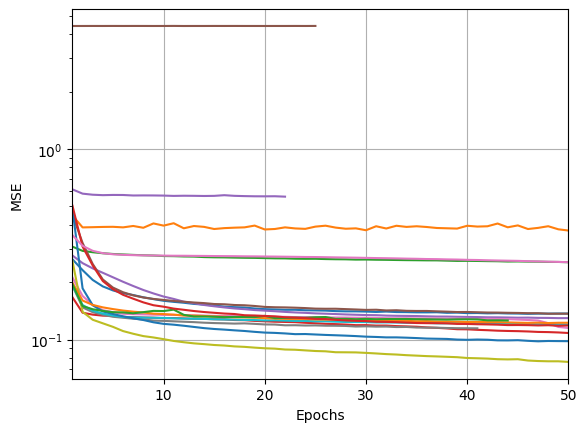

In [33]:
lc_train_mse = results["m:lc_train_mse"].map(json_to_array)

plt.figure()

for i, lc in enumerate(lc_train_mse):
    plt.plot(lc[:, 0], lc[:, 1], label=f"Trial {i}")

plt.yscale("log")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid()
plt.xlim(1, 50)
plt.show()

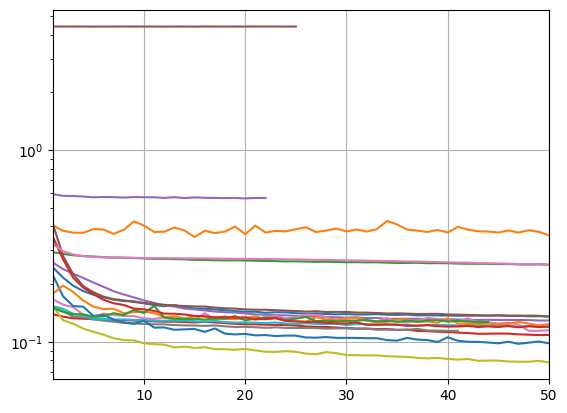

In [28]:
lc_valid_mse = results["m:lc_valid_mse"].map(json_to_array)

plt.figure()

for i, lc in enumerate(lc_valid_mse):
    plt.plot(lc[:, 0], lc[:, 1], label=f"Trial {i}")

plt.yscale("log")
plt.grid()
plt.xlim(1, 50)
plt.show()

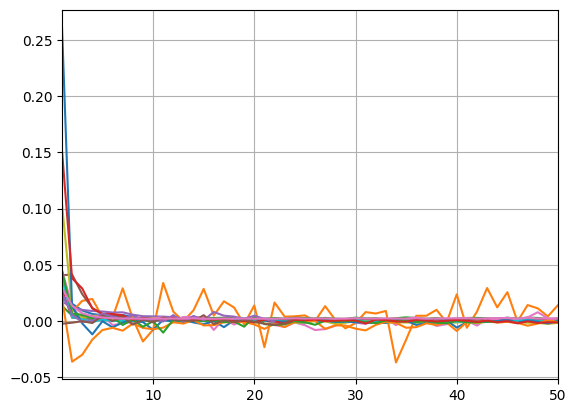

In [31]:
plt.figure()

for i, (lc_train, lc_valid) in enumerate(zip(lc_train_mse, lc_valid_mse)):
    plt.plot(lc_train[:, 0], (lc_train[:, 1]-lc_valid[:, 1]), label=f"Trial {i}")

# plt.yscale("log")
# plt.xscale("log")
plt.grid()
plt.xlim(1, 50)
plt.show()

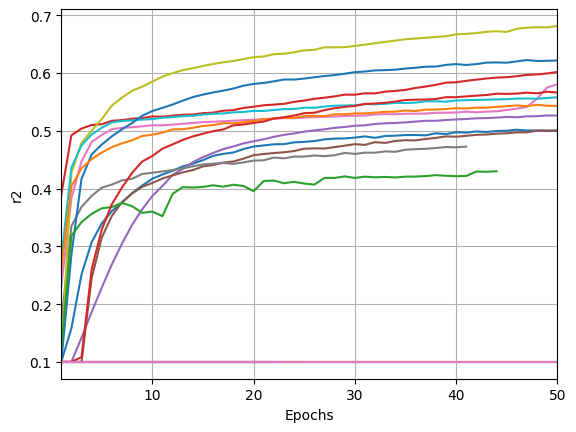

In [36]:
lc_train_r2 = results["m:lc_train_r2"].map(json_to_array)

plt.figure()

for i, lc in enumerate(lc_train_r2):
    plt.plot(lc[:, 0], np.maximum(lc[:, 1], 0.1), label=f"Trial {i}")

# plt.yscale("log")
plt.xlabel("Epochs")
plt.ylabel("r2")
plt.grid()
plt.xlim(1, 50)
plt.show()

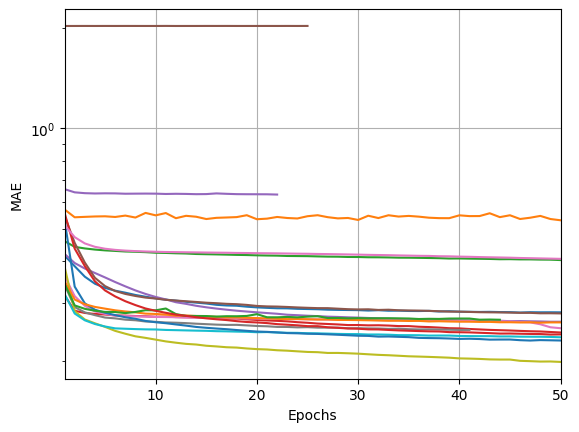

In [39]:
lc_train_mae = results["m:lc_train_mae"].map(json_to_array)

plt.figure()

for i, lc in enumerate(lc_train_mae):
    plt.plot(lc[:, 0], lc[:, 1], label=f"Trial {i}")

plt.yscale("log")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.grid()
plt.xlim(1, 50)
plt.show()

## Results with Learning Curves for Multi-Objectives Optimization

In [40]:
results_path = "example-results-combo-with-lc-moo.csv"
results_moo = pd.read_csv(results_path)
results_moo

,p:activation,p:base_lr,p:batch_normalization,p:batch_size,p:dense_0,p:dense_1,p:dense_2,p:dense_feature_layers_0,p:dense_feature_layers_1,p:dense_feature_layers_2,...,m:train_r2,m:train_corr,m:valid_mse,m:valid_mae,m:valid_r2,m:valid_corr,m:test_mse,m:test_mae,m:test_r2,m:test_corr
0,linear,0.001462,False,154,77,32,808,130,14,38,...,0.509673,0.714432,0.135701,0.278107,0.507214,0.712842,0.136693,0.278652,0.506010,0.711850
1,sigmoid,0.000049,True,447,193,18,15,15,45,385,...,-0.453298,-0.003659,0.400489,0.552174,-0.454343,0.003288,0.402995,0.554147,-0.456370,-0.000068
2,relu,0.000541,True,492,32,84,495,887,923,12,...,0.080212,0.283974,0.251898,0.400077,0.085252,0.293491,0.253464,0.401275,0.084015,0.291089
3,tanh,0.001740,False,111,12,836,675,247,28,959,...,0.609311,0.780768,0.108653,0.243301,0.605435,0.778265,0.109302,0.243759,0.604998,0.778097
4,softsign,0.000392,False,160,46,637,105,353,165,355,...,0.532761,0.734009,0.129143,0.262748,0.531029,0.732855,0.129938,0.262688,0.530421,0.732651
5,tanh,0.000766,True,185,740,63,918,11,54,32,...,0.700029,0.837321,0.084620,0.209877,0.692709,0.832885,0.084880,0.210013,0.693257,0.833187
6,elu,0.000011,True,151,890,511,936,537,23,84,...,0.507194,0.712803,0.136819,0.278255,0.503152,0.710083,0.137434,0.278588,0.503332,0.710206
7,gelu,0.001887,True,11,12,767,176,173,56,315,...,0.583659,0.764377,0.114721,0.247848,0.583400,0.764203,0.115564,0.248820,0.582366,0.763565
8,sigmoid,0.000302,False,28,214,140,131,199,965,169,...,0.563358,0.804405,0.121223,0.235689,0.559790,0.800719,0.121995,0.236508,0.559127,0.800461
9,softplus,0.000039,False,32,261,13,17,245,770,128,...,0.652198,0.808258,0.097243,0.228608,0.646871,0.805012,0.097783,0.229081,0.646625,0.804786


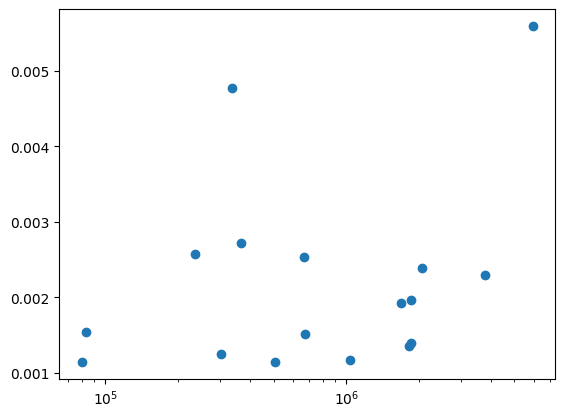

In [47]:
plt.figure()

plt.plot(-results_moo["objective_1"], -results_moo["objective_2"], "o")

plt.xscale("log")
plt.show()